In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\Advertising.csv")

In [7]:
print(dataset.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [112]:
# Drop Unnecessary Columns (like unnamed index columns) and Rename 'Unnamed: 0'
dataset_no_sequence = dataset.drop(columns=['Sequence'], errors='ignore')  # Drop if it exists
print(dataset_no_sequence.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [116]:
print(dataset.isnull().sum())

Sequence     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [122]:
#Fill or drop missing values
dataset = dataset.fillna(dataset.median())

In [124]:
# Data Preprocessing
categorical_cols = dataset.select_dtypes(include=['object']).columns

In [29]:
# Encoding categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

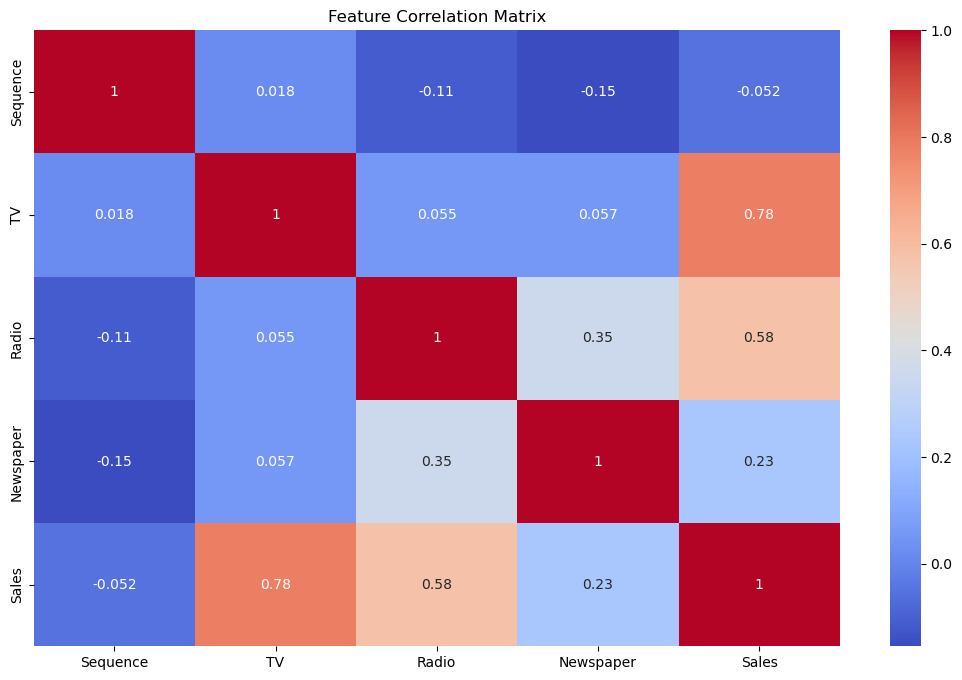

In [128]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

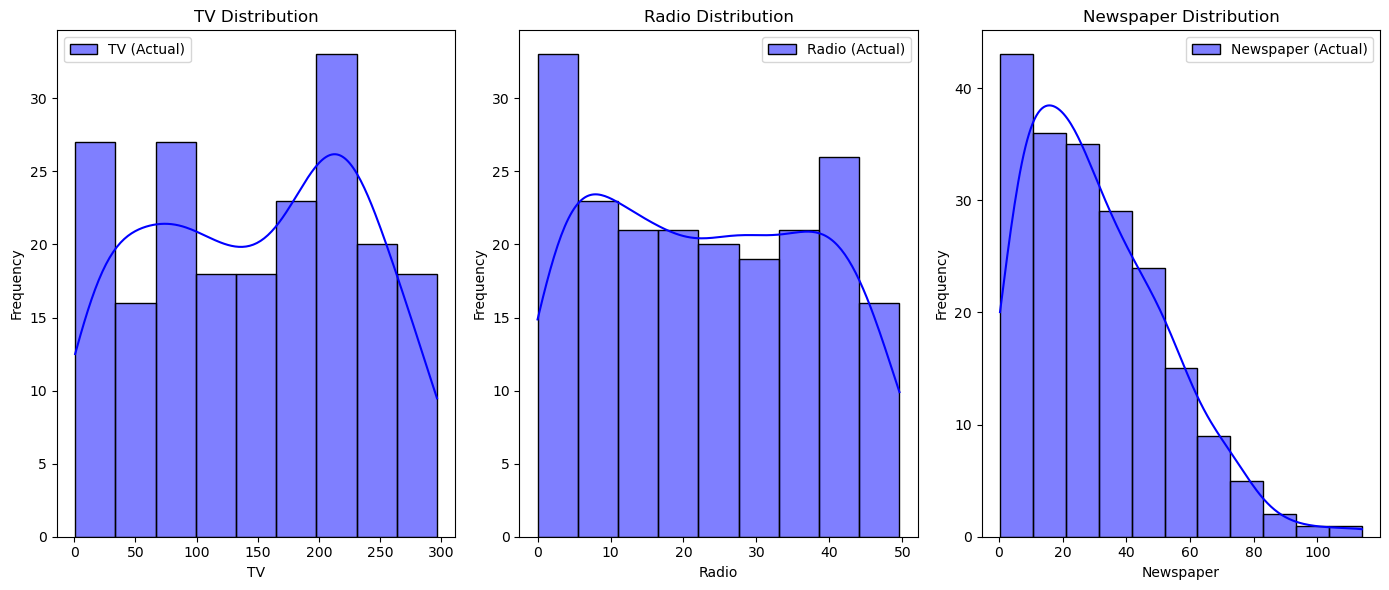

In [130]:
 #Visualization of Actual vs Predicted Sales Before Applying Model
plt.figure(figsize=(14, 6))
columns_to_plot = [col for col in X.columns if not col.startswith('Unnamed')]
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.histplot(X[column], kde=True, color='blue', label=f'{column} (Actual)')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


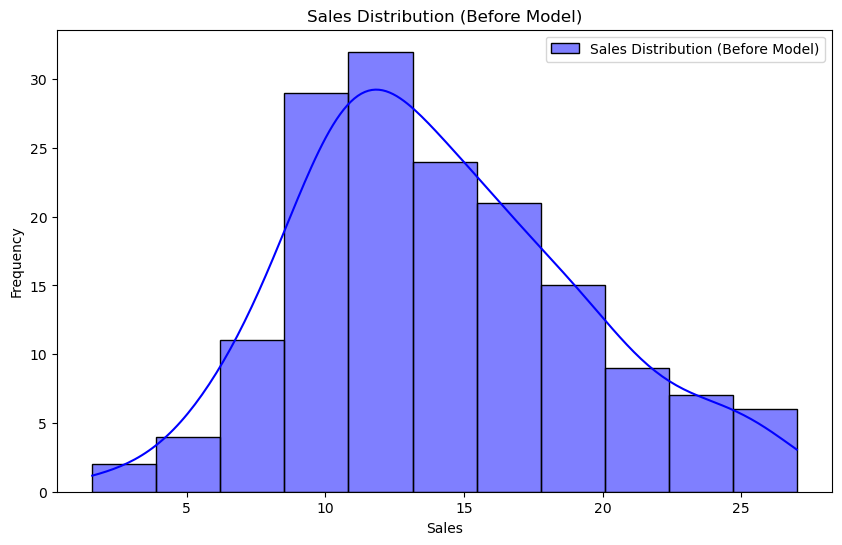

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue', label='Sales Distribution (Before Model)')
plt.title('Sales Distribution (Before Model)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

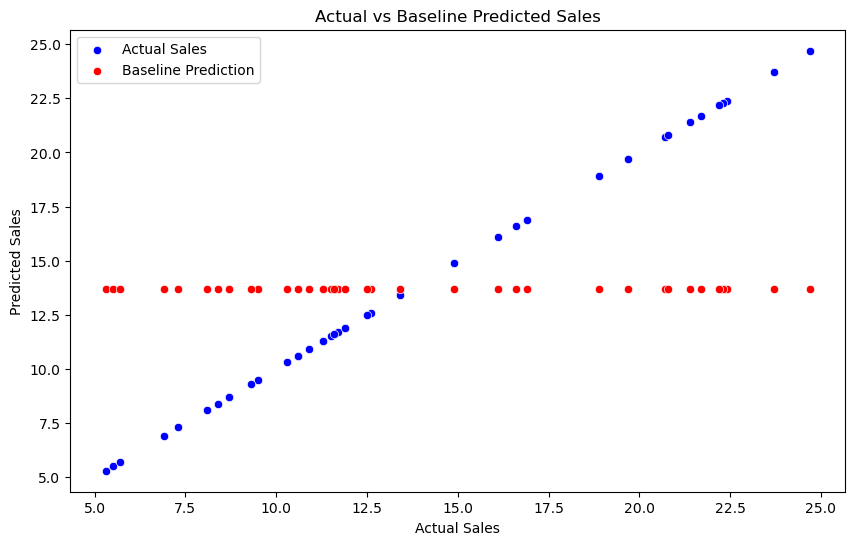

In [96]:
#Visualize Actual vs Predicted Sales before applying models
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Sales')
sns.scatterplot(x=y_test, y=[y_test.mean()] * len(y_test), color='red', label='Baseline Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Baseline Predicted Sales')
plt.legend()
plt.show()

In [35]:
# Replace 'Sales' with the target column name
X = dataset.drop('Sales', axis=1)  
y = dataset['Sales']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

best_model = None
best_r2 = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared Score: {r2}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with R-squared Score: {best_r2}")



Linear Regression Results:
Mean Absolute Error: 1.4650601050102923
Mean Squared Error: 3.1990044685888988
Root Mean Squared Error: 1.788576100865965
R-squared Score: 0.8986489151417082

Ridge Regression Results:
Mean Absolute Error: 1.4685797685620277
Mean Squared Error: 3.2192036399669677
Root Mean Squared Error: 1.794213933723336
R-squared Score: 0.8980089635716159

Lasso Regression Results:
Mean Absolute Error: 1.8549283137675237
Mean Squared Error: 5.744679831063471
Root Mean Squared Error: 2.3968061730276546
R-squared Score: 0.8179966490329236

ElasticNet Results:
Mean Absolute Error: 2.4186556527840763
Mean Squared Error: 8.641835911292215
Root Mean Squared Error: 2.9396999696044177
R-squared Score: 0.7262087460718183

Decision Tree Results:
Mean Absolute Error: 1.0775000000000001
Mean Squared Error: 1.9097500000000003
Root Mean Squared Error: 1.3819370463230227
R-squared Score: 0.9394951660090987

Random Forest Results:
Mean Absolute Error: 0.6872499999999989
Mean Squared Error

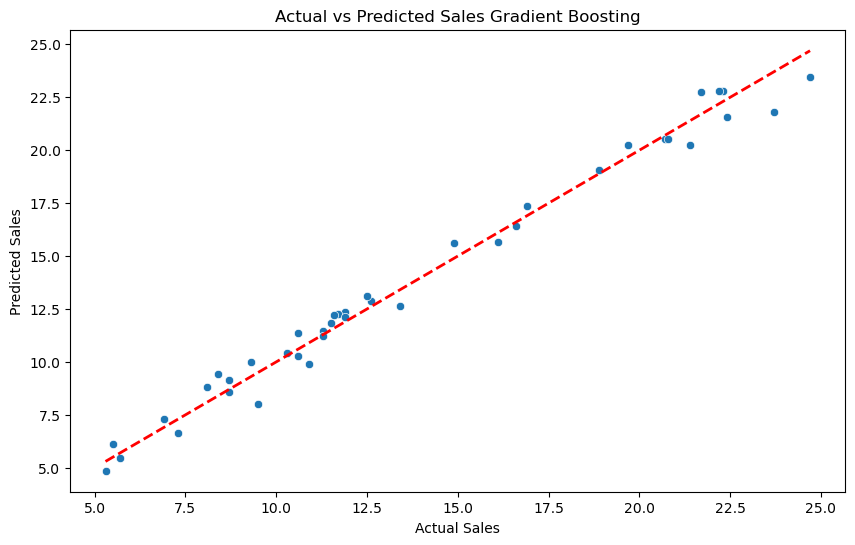

In [88]:
# Scatter plot for actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_model.predict(X_test))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.show()

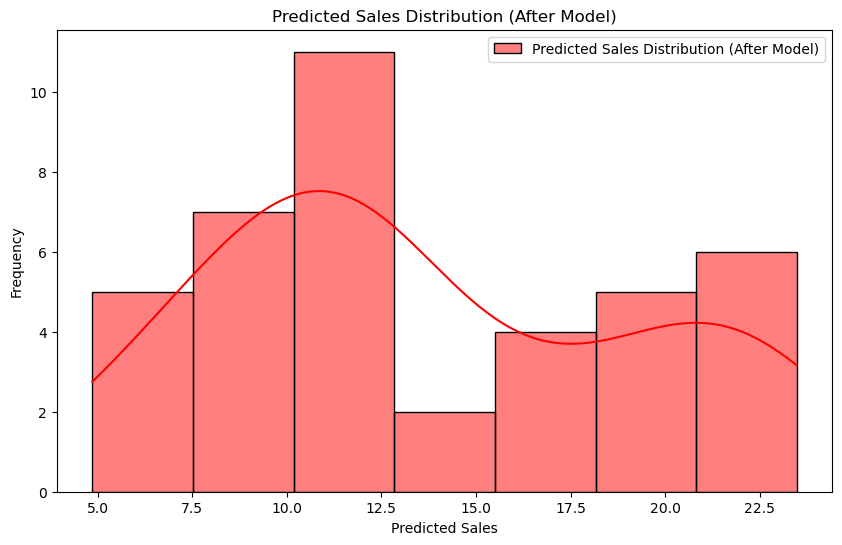

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='red', label='Predicted Sales Distribution (After Model)')
plt.title('Predicted Sales Distribution (After Model)')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

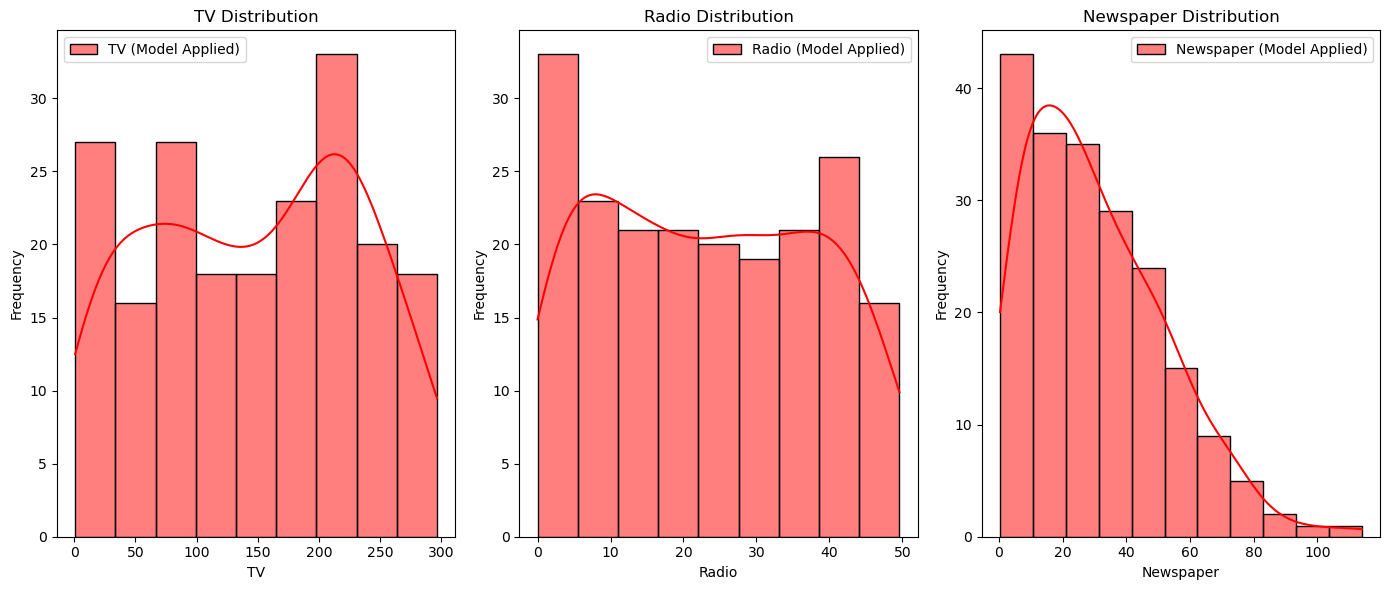

In [98]:
#Visualization of Feature Distributions After Applying the Model
plt.figure(figsize=(14, 6))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.histplot(X[column], kde=True, color='red', label=f'{column} (Model Applied)')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

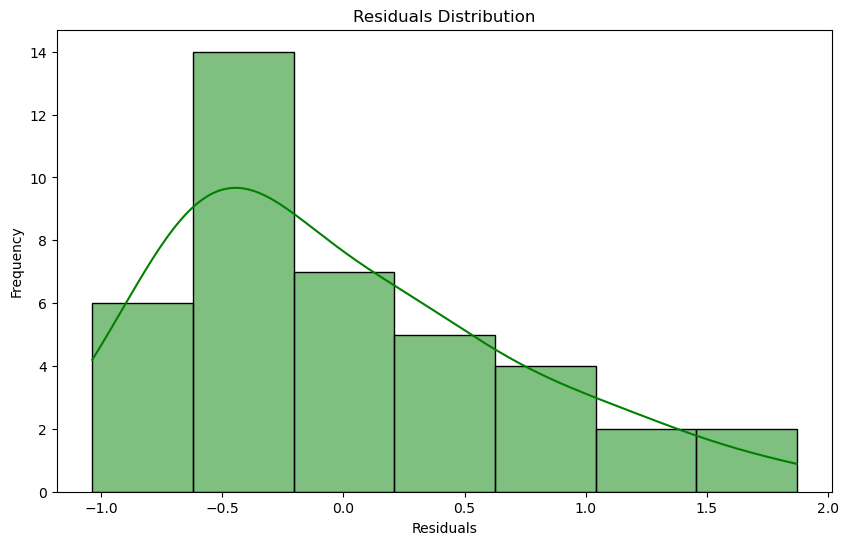

In [140]:
#Residual Plot After Appllying the Gradient Boosting Model
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='Green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [142]:
dataset.to_csv("C:\\Users\\hp\\Desktop\\Projects Data\\Processed_Advertising.csv", index=False)

# Save the X and y (features and target) after splitting and processing
X_processed = pd.DataFrame(X, columns=dataset.drop('Sales', axis=1).columns)
X_processed['Sales'] = y  # Adding the target column for reference

# Saving the processed data including features and target
X_processed.to_csv("C:\\Users\\hp\\Desktop\\Projects Data\\Processed_Features_Sales.csv", index=False)

print("Processed data saved successfully.")

Processed data saved successfully.
